In [1]:
# Goal: draw Julia set J(f) for f(z) = z^2 + c, c a fixed complex number
# by drawing escaping set for f (J(f) is the boundary of escaping set)

In [2]:
# Last time: Drawing sets represented by grids 
import numpy

In [4]:
a=numpy.zeros((4,4))
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
# Each element of a will represent a complex number
a[2,0] = 1 # will represent point at (0,2) 
a[1,3]=1

In [10]:
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.]])

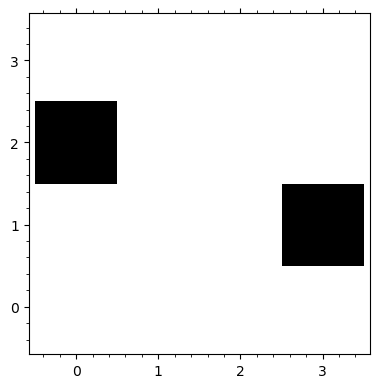

In [11]:
matrix_plot(a, origin='lower') 

In [ ]:
# above represents set {(0,2), (3,1)}

In [12]:
# Dealing with complex numbers.  Use python complex numbers (for efficieny)
complex(1,3) # represents 1+3i

(1+3j)

In [13]:
complex(0,1)^2

(-1+0j)

In [14]:
complex(0,1)^2 + complex(3,4)

(2+4j)

In [15]:
abs(complex(0,1)^2 + complex(3,4))

4.47213595499958

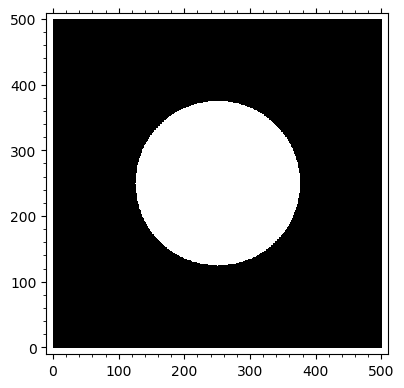

In [20]:
# now we'll draw subsets of complex plane, using a grid
# will draw outside of unit circle (which is escaping set for f(z)=z^2)

#specify grid that will represent a rectangle in complex plane
width = 500
height = 500 
xmin = -2.0
xmax = 2.0
ymin = -2.0
ymax = 2.0

xinc = (xmax-xmin)/width
yinc = (ymax-ymin)/height

our_grid = numpy.zeros((height,width))
# array will eventually represent outside of unit circle 

for x in range(width):
    for y in range(height): 
        # Decide whether z = complex number corresponding to x,y is 
        # outside unit circle 
        z = complex(xmin + x*xinc, ymin + y*yinc)
        if abs(z)>1:
            # in this case, z is outside unit circle
            our_grid[y,x]=1

matrix_plot(our_grid, origin='lower')
        

In [21]:
def julia(c, max_iter, width=500, height=500, xmin=-2.0, xmax=2.0, ymin=-2.0,ymax=2.0):
    """Draw Julia set J(f) for f(z)=z^2+c in window where x ranges 
    in (xmin,xmax), y ranges in (ymin,ymax), grid of size width x height.
    Test max_iter number iterates of f."""

    xinc = (xmax-xmin)/width
    yinc = (ymax-ymin)/height

    escape = numpy.zeros((height,width))
    # array will eventually represent escaping

    for x in range(width):
        for y in range(height): 
            z = complex(xmin + x*xinc, ymin + y*yinc)
            # Want: set escape[y,x]=1 if z escapes i.e. |z|, |f(z)|, |f^{\circ 2}(z)| ->infty
            # Special thing about f(z) = z^2+c, when |c|<2:
            # if |z|>2, |f^{\circ n}(z)|-> infty as n ->infty
            # So: if for any z, |f^{\circ k}(z)|>2, z escapes 
            
            # compute iterates of f applied to z 
            n=0 # which iterate we're currently on
            while n < max_iter: 
                z = z^2 + c # take next iterate i.e. replace z by f(z)
                n+=1
                if abs(z)>2:
                    # then by above comments, know that original z escapes 
                    escape[y,x]=1
                    break # breaks out of containing loop 
    
    return matrix_plot(escape, origin='lower')

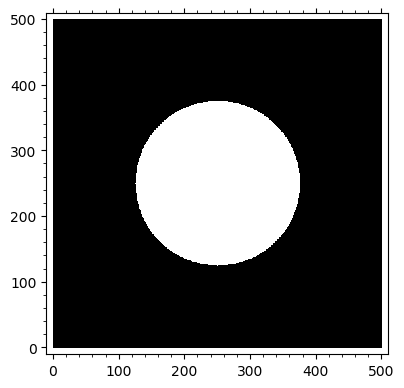

In [22]:
julia(complex(0,0), 20) # julia set of f(z)=z^2

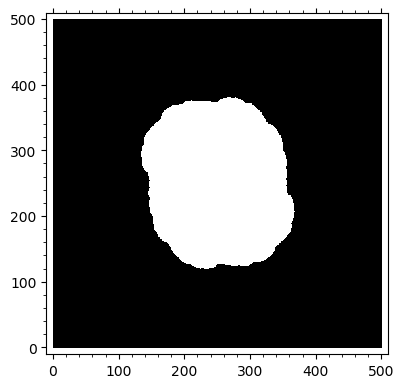

In [23]:
julia(complex(0.14,0.1), 20) # julia set of f(z)=z^2+(0.14+0.1i)

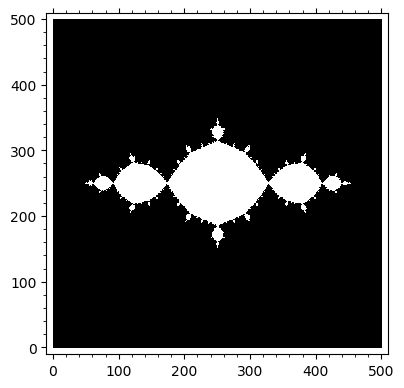

In [25]:
julia(complex(-1,0), 20) # julia set of f(z)=z^2-1
# "basillica" julia set 